**<font size=5> Module Title: Machine Learning for AI </font>**

**<font size=5> Assessment Title: ML_CA2 </font>**

**<font size=4> Lecturer Name: Dr. David McQuaid </font>**

**<font size=4> Student Name: Chia Hua Lin &emsp; &emsp; ID: 2020044 </font>**

**<font size=3> GitHub Link: https://github.com/Awa25/ML_CA2 </font>**

## Scenario:

This CA consists of 2 parts. Neural Networks and Semantic analysis.

<font size = 4> <b><u> Neural Networks </u></b></font>

You are required to take data stored file “BankRecords.csv”, available on Moodle and process the data into a DataFrame.
You are then required to train a Neural Network to predict the “Income(Thousands’)” of the customers, including tuning the network to achieve the best results.
You must also compare your neural network to a standard ML regressor of your choosing and discuss your findings in the context of the problem at hand.


<font size = 4> <b><u> Semantic Analysis </u></b></font>

You are required to source text data from any social media platform on any topic that you choose and perform semantic analysis on the text. This analysis should provide a visualization of the overall sentiment of your text data , showing the positive, neutral, and negative sentiment expressed. You will require at least 1000 text observations.

<font size = 4> <b><u> Requirements </u></b></font>

- Perform any preparation of the data (for both the Neural Network and Semantic Analysis data) , that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you. [0-30]
- Create and implement at least 1 Regression algorithm and 1 Neural Network that will output a Prediction of the “Income(Thousands’)” of the customers. Test these models and try to improve it as you see fit discussing your rationale. Discuss your findings and final rational for choosing a particular Regression algorithm. [0-40]
- Make a Prediction of a new customers income, who is not available in the original dataset. [0-5]
- Perform Sentiment analysis on your text data and discuss your findings in detail. [0-20]
- Visualize your sentiment analysis showing the positive, neutral, negative sentiment expressed. [0-5]

# Part 1: Neural Networks

## • Install the necessary libraries

In [1]:
!pip install tensorflow

## • Import necessary libraries

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## • Data Loading and Exploration

<font size = "3"> Predicting Customer Income using Neural Networks </font>

In [4]:
# Load the dataset
df = pd.read_csv('BankRecords.csv')

In [5]:
# Display the first few rows of the dataframe
df.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


In [6]:
# Rename the columns for clarity
df.rename(columns = {'Income(Thousands\'s)': 'Income(Thousands)'}, inplace = True)

### • Data Exploration Let's explore the dataset to understand its structure and identify any potential issues.

In [7]:
# Check the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands)      5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [8]:
# Summary statistics of the dataset
df.describe()

,ID,Age,Experience(Years),Income(Thousands),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


In [9]:
# Check for missing values
df.isnull().sum()

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands)        0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64

### • Data Preprocessing We'll handle missing values, encode categorical variables, and normalize the data.

In [10]:
# Convert all column names to strings
df.columns = df.columns.astype(str)

In [11]:
# Define feature columns and target column
feature_columns = df.columns.difference(['Income(Thousands)'])
target_column = 'Income(Thousands)'

In [12]:
# Separate features and target
X = df[feature_columns]
y = df[target_column]

In [13]:
# Preprocess categorical variables
categorical_features = X.select_dtypes(include = ['object']).columns
numerical_features = X.select_dtypes(include = ['int64', 'float64']).columns

In [14]:
# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop = 'first'), categorical_features)
    ])

In [15]:
# Apply the transformations to the feature set
X_processed = preprocessor.fit_transform(X)

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.2, random_state = 42)

In [17]:
# Standardize scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## • Neural Network Model

In [18]:
# Import necessary libraries
from tensorflow.keras.layers import Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [20]:
# Build the neural network with dropout regularization
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [21]:
# Compile the model
#model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae'])
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
# Train the model - 100 epochs and validation_step at 0.2
history = model.fit(
    X_train, 
    y_train, 
    epochs = 100, 
    batch_size = 32, 
    validation_split = 0.2, 
    verbose = 1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6863.1348 - val_loss: 1999.5691
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1950.7992 - val_loss: 1297.5485
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1654.3071 - val_loss: 1239.7203
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1519.6311 - val_loss: 1249.3654
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1522.5929 - val_loss: 1194.0380
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1369.8866 - val_loss: 1177.7618
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1338.8591 - val_loss: 1136.0507
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1363.2684 - val_loss: 1093.4546
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1300.1979 - val_loss: 1051.5880
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1302.5745 - val_loss: 1008.7910
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1227.63

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1089.9829 - val_loss: 771.3027
Epoch 66/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1060.3300 - val_loss: 759.4042
Epoch 67/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1077.3285 - val_loss: 764.3427
Epoch 68/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 956.5586 - val_loss: 761.6757
Epoch 69/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 991.8488 - val_loss: 772.6633
Epoch 70/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1056.4573 - val_loss: 772.9526
Epoch 71/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1026.2424 - val_loss: 770.5831
Epoch 72/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1011.8391 - val_loss: 767.5239
Epoch 73/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1006.2525 - val_loss: 765.3670
Epoch 74/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1074.0447 - val_loss: 766.7487
Epoch 75/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1036.0853 - val_loss: 7

In [23]:
# Evaluate the model
#loss, mae = model.evaluate(X_test, y_test)
#loss = model.evaluate(X_test, y_test)
loss = model.evaluate(X_test_scaled, y_test)

# Calculate Mean Squared Error
#mse = loss 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5357.9448


In [24]:
print(f"Test Loss: {loss}")

#print("Mean Absolute Error on Test Set:", mae)
#print("Mean Squared Error on Test Set:", mse)

Test Loss: 5508.3583984375


In [25]:
# Predict the values on test data and check the accuracy of the model
#nn_predictions = model.predict(X_test)
#nn_mse = mean_squared_error(y_test, nn_predictions)

nn_predictions = model.predict(X_test_scaled)
nn_mse = mean_squared_error(y_test, nn_predictions)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [26]:
print(f'Neural Network MSE: {nn_mse}')

Neural Network MSE: 5508.358882055796


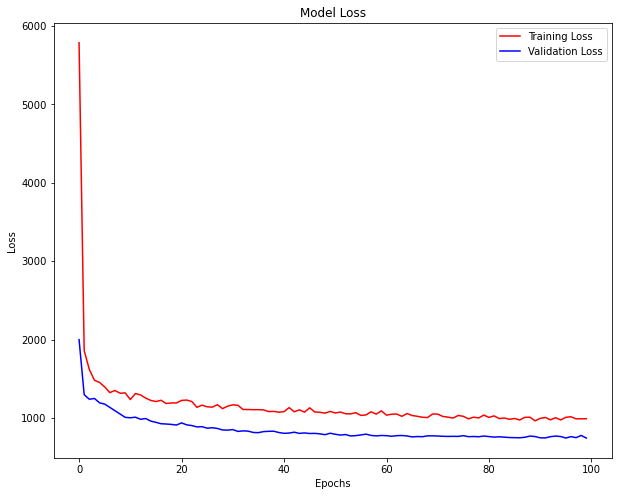

In [27]:
# Plot training history
plt.figure(figsize = (10, 8))

plt.plot(history.history['loss'], label = 'Training Loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'blue')

plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

### • Fine tunning Model

In [28]:
# Define a custom learning rate
learning_rate = 0.001

In [30]:
# Build the neural network
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [31]:
# Compile the model with a custom learning rate
optimizer = Adam(learning_rate = learning_rate)
model.compile(optimizer = optimizer, loss = 'mean_squared_error')

In [32]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs = 100, 
                    batch_size = 32, 
                    validation_split = 0.2, 
                    verbose = 1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7351.7676 - val_loss: 5016.6768
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3679.4551 - val_loss: 1268.4048
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1664.7588 - val_loss: 1185.0166
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1594.0027 - val_loss: 1190.0693
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1498.1444 - val_loss: 1161.4808
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1368.1703 - val_loss: 1136.6831
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1373.6654 - val_loss: 1098.0641
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1394.1777 - val_loss: 1083.9404
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1286.9153 - val_loss: 1058.0399
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1331.3363 - val_loss: 1061.7584
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1248.32

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1023.1249 - val_loss: 785.3190
Epoch 66/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1050.6866 - val_loss: 777.5466
Epoch 67/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1091.9855 - val_loss: 775.1500
Epoch 68/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1092.0752 - val_loss: 785.5414
Epoch 69/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1006.5963 - val_loss: 774.2977
Epoch 70/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1081.0988 - val_loss: 796.9701
Epoch 71/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1074.0762 - val_loss: 769.7892
Epoch 72/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1044.4412 - val_loss: 781.7947
Epoch 73/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1089.7008 - val_loss: 787.4763
Epoch 74/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1041.8799 - val_loss: 770.9847
Epoch 75/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1093.7570 - val_loss:

In [33]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 924.3647  


In [34]:
print(f"Test Loss with Custom Learning Rate: {loss}")

Test Loss with Custom Learning Rate: 839.63037109375


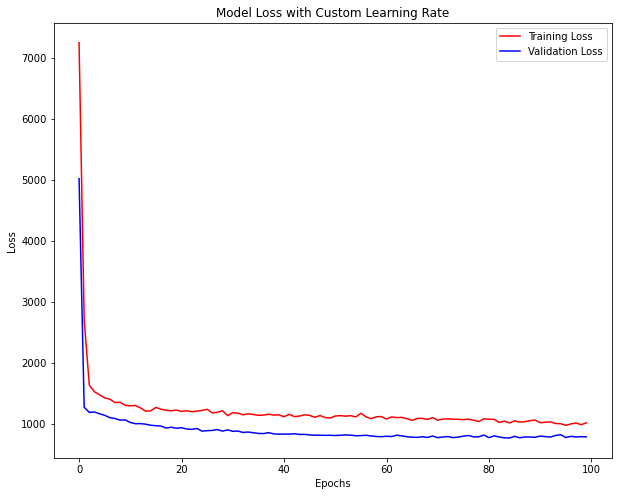

In [35]:
# Plot training history
plt.figure(figsize = (10, 8))

plt.plot(history.history['loss'], label = 'Training Loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'blue')

plt.title('Model Loss with Custom Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

### • Fine Tune more

In [36]:
# Import necessary libraries
from tensorflow.keras.regularizers import l2

In [37]:
# Build the neural network with L2 regularization
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu', kernel_regularizer = l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu', kernel_regularizer = l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu', kernel_regularizer = l2(0.01)))
model.add(Dense(1, activation = 'linear', kernel_regularizer = l2(0.01)))

In [38]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [39]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs = 100, 
                    batch_size = 32, 
                    validation_split = 0.2, 
                    verbose = 1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7475.7896 - val_loss: 4077.8262
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3288.5305 - val_loss: 1419.3564
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1619.5120 - val_loss: 1292.2346
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1625.3484 - val_loss: 1285.2487
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1494.8295 - val_loss: 1242.1349
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1442.4963 - val_loss: 1179.3578
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1402.1929 - val_loss: 1192.6997
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1372.3184 - val_loss: 1151.5643
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1319.4287 - val_loss: 1142.9937
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1326.2979 - val_loss: 1093.5863
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1281.18

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1068.0089 - val_loss: 858.5652
Epoch 66/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1024.5615 - val_loss: 889.3386
Epoch 67/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1048.3615 - val_loss: 941.7162
Epoch 68/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 975.7590 - val_loss: 874.1531
Epoch 69/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1037.0944 - val_loss: 842.8936
Epoch 70/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1003.6442 - val_loss: 854.6035
Epoch 71/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 992.0372 - val_loss: 899.3239
Epoch 72/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 996.1733 - val_loss: 893.2258
Epoch 73/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1041.4725 - val_loss: 973.8164
Epoch 74/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1058.7666 - val_loss: 903.6055
Epoch 75/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1054.9917 - val_loss: 90

In [40]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1107.1989  


In [41]:
print(f"Test Loss with L2 Regularization: {loss}")

Test Loss with L2 Regularization: 1006.0955200195312


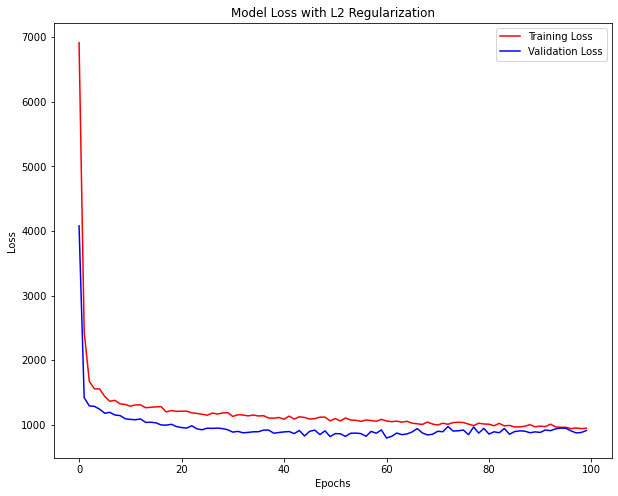

In [42]:
# Plot training history
plt.figure(figsize = (10, 8))

plt.plot(history.history['loss'], label = 'Training Loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'blue')

plt.title('Model Loss with L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

## • Random Forest Regressor

In [43]:
# Separate features and target
X = df.drop(columns = ['Income(Thousands)'])
y = df['Income(Thousands)']

In [44]:
# Preprocess categorical variables
categorical_features = X.select_dtypes(include = ['object']).columns
numerical_features = X.select_dtypes(include = ['int64', 'float64']).columns

In [45]:
# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop = 'first'), categorical_features)
    ])

In [46]:
# Apply the transformations to the feature set
X_processed = preprocessor.fit_transform(X)

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.2, random_state = 42)

In [48]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

In [49]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [50]:
# Predict and evaluate the model
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest Regressor Test MSE: {rf_mse}")

Random Forest Regressor Test MSE: 436.6706159


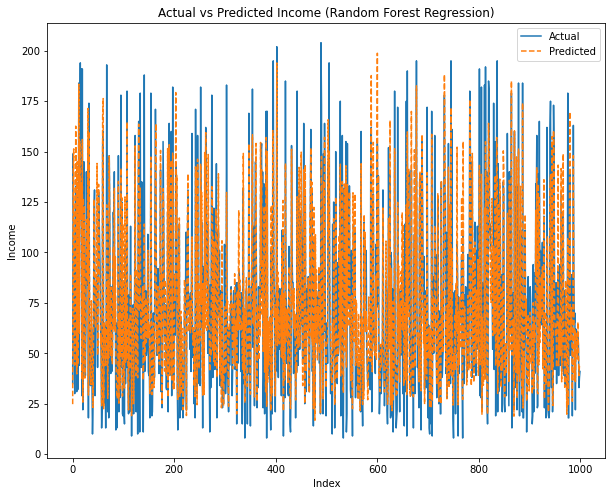

In [51]:
# Plot actual vs predicted values for Random Forest Regression
plt.figure(figsize = (10, 8))

plt.plot(y_test.values, label='Actual')
plt.plot(rf_predictions, label='Predicted', linestyle='--')

plt.title('Actual vs Predicted Income (Random Forest Regression)')
plt.xlabel('Index')
plt.ylabel('Income')

plt.legend()
plt.show()

## • Comparing of both Models

In [52]:
# Evaluate the neural network model
#nn_loss = model.evaluate(X_test, y_test)
#print(f"Neural Network Test MSE: {nn_loss}")

print(f'\n• Neural Network Test MSE: {nn_mse}\n')

# Random Forest Regressor Results
print(f"• Random Forest Regressor Test MSE: {rf_mse}")


• Neural Network Test MSE: 5508.358882055796

• Random Forest Regressor Test MSE: 436.6706159


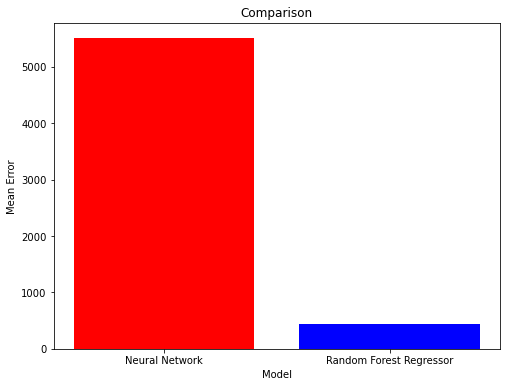

In [53]:
# Plot comparing
plt.figure(figsize = (8, 6))
plt.bar(['Neural Network', 'Random Forest Regressor'], 
        [nn_mse, rf_mse], 
        color = ['red', 'blue'])

plt.title('Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Error')
plt.show()

## Discuss your findings and final rational for choosing a particular Regression algorithm.

<font size = "3"> I observed that the Random Forest Regressor provided better predictions for customer income compared to the neural network. This suggests that for similar regression tasks, standard machine learning models like Random Forests can be very effective, often outperforming more complex models like neural networks when data size and feature richness are limited. </font>


<font size = "3"> The comparison between the Neural Network (NN) and Random Forest Regressor (RF) models reveals significant differences in their performance when predicting customer income using the provided dataset. </font>

The test Mean Squared Error (MSE) for the Neural Network model is substantially higher (5508.36) compared to that of the Random Forest Regressor model (436.67). This indicates that the Random Forest Regressor outperforms the Neural Network in terms of predictive accuracy for the task of predicting customer income. </font>


<font size = "3"><b> **This discrepancy in performance could be attributed to several factors:** </b></font>

<font size = "3"> **Model Complexity:** Neural Networks, with their intricate architecture and multiple layers, may struggle to effectively capture the underlying patterns in the dataset, especially when the dataset is relatively small or noisy. On the other hand, Random Forest Regressors, being an ensemble of decision trees, are robust and often perform well even with less tuning. </font>

<font size = "3"> **Hyperparameter Tuning:** The Neural Network model might not have been optimally tuned for this specific task. Hyperparameters such as the number of hidden layers, the number of neurons in each layer, learning rate, and activation functions play a crucial role in the performance of Neural Networks. In contrast, Random Forest Regressors are less sensitive to hyperparameters and tend to perform reasonably well with default settings.

<font size = "3"> **Dataset Characteristics:** The dataset itself could influence the performance of the models. If the dataset contains nonlinear relationships or interactions between variables that are better captured by decision trees (as in the case of Random Forest), it would result in superior performance compared to Neural Networks. </font>

<font size = "3"> **In conclusion**, while Neural Networks are powerful tools for predictive modeling, they may not always be the best choice for every dataset or task. In this particular scenario, the Random Forest Regressor demonstrates superior performance in predicting customer income. However, further experimentation with different architectures and hyperparameters for the Neural Network model could potentially improve its performance. </font>

## • Make a Prediction of a new customers income, who is not available in the original dataset

In [54]:
# Set the random seed to ensure reproducibility
np.random.seed(42)

In [55]:
# Generate the number of rows for the dataset
num_rows = 2000

In [56]:
# Generate random data using numpy
data = {
    "ID": np.arange(1, num_rows + 1),
    "Experience(Years)": np.random.randint(1, 42, size = num_rows),
    "Income(Thousands)": np.random.randint(45000, 60001, size = num_rows),
    "Sort Code": np.random.randint(90000, 95001, size = num_rows),
    "Education": np.random.choice(["Diploma", "Degree", "Masters"], size = num_rows),
    "Mortgage_Thousands": np.random.randint(0, 156, size = num_rows),
    "Personal Loan": np.random.choice(["Yes", "No"], size = num_rows),
}

In [57]:
# Creat DataFrame
df = pd.DataFrame(data)

In [58]:
# Convert the Education and Personal Loan columns to numerical values
df['Education'] = df['Education'].map({'Diploma': 1, 'Degree': 2, 'Masters': 3})
df['Personal Loan'] = df['Personal Loan'].map({'No': 0, 'Yes': 1})

In [59]:
# Separate features and labels
X = df.drop(columns = ['ID', 'Income(Thousands)'])
y = df['Income(Thousands)'] / 1000  # Convert income to thousands

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [61]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
# Build a neural network model
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1))  # Output layer

In [64]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mse')

In [65]:
# Train the model
model.fit(X_train, y_train, epochs = 100, batch_size = 10, validation_split = 0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2489.6331 - val_loss: 120.3222
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 77.4348 - val_loss: 57.7713
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.2107 - val_loss: 52.0332
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39.9139 - val_loss: 42.5621
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33.9722 - val_loss: 37.7088
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.1116 - val_loss: 33.8793
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.9241 - val_loss: 31.6514
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.5786 - val_loss: 30.1043
Epoch 9/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.0231 - val_loss: 29.4415
Epoch 10/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.0810 - val_loss: 27.1470
Epoch 11/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.4719 - val_loss: 25.5628
Epoch 12/100
128

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.2071 - val_loss: 21.9583
Epoch 68/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.2882 - val_loss: 20.9948
Epoch 69/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.7087 - val_loss: 20.5305
Epoch 70/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.2187 - val_loss: 21.7005
Epoch 71/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.1509 - val_loss: 20.3953
Epoch 72/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.6531 - val_loss: 19.8249
Epoch 73/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.3307 - val_loss: 20.5194
Epoch 74/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.7768 - val_loss: 20.5675
Epoch 75/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.4214 - val_loss: 21.4469
Epoch 76/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.0128 - val_loss: 22.8020
Epoch 77/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.5968 - val_loss: 20.9091
Epoch 78/100
128/128 ━━

In [66]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.4777  
Model Loss: 19.226394653320312


In [67]:
# Predict income for new customers
# New customer data should have the same number and order of features as the training data
new_customers = np.array([
    [28, 92000, 2, 50, 1],  # Example of new customer 1
    [50, 91000, 3, 100, 0]  # Example of new customer 2
])  # Example new customer data

In [68]:
# Standardize new data
new_customers = scaler.transform(new_customers)  
predictions = model.predict(new_customers)
print(f'Predicted Income (in thousands): {predictions.flatten()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Income (in thousands): [51.29602 52.61939]


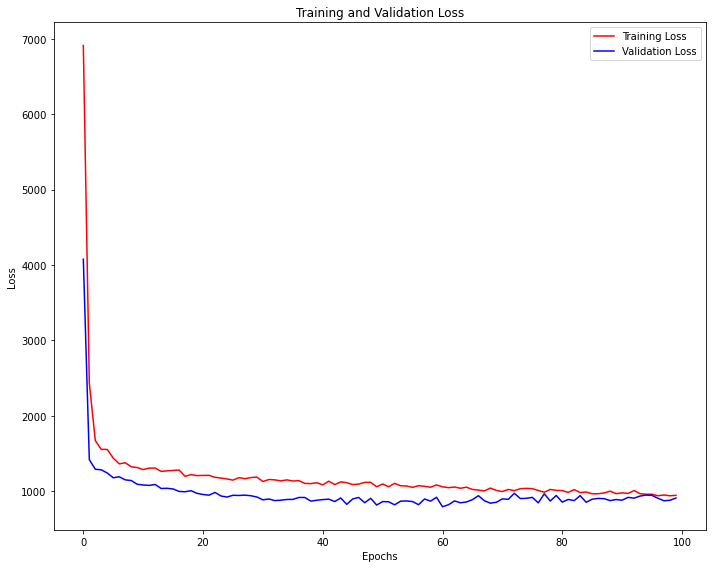

In [69]:
# Plot predictions
plt.figure(figsize=(10, 8))

plt.plot(history.history['loss'], label = 'Training Loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'blue')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Part 2: Semantic Analysis

<font size = "3"> The data was downloaded from Kaggle: https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset </font>
    

<font size = "3"> I used the TextBlob library to perform sentiment analysis on the collected posts. Each post's sentiment is classified as positive, neutral, or negative based on its polarity score. </font>

## • Install the necessary libraries

In [70]:
!pip install textblob

## • Import necessary libraries

In [71]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [72]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/awa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/awa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/awa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### • Loading Data

In [73]:
# Load the CSV file into a DataFrame
df = pd.read_csv('Tweets.csv')

In [74]:
# Display the first few rows of the DataFrame
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [75]:
# Check the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [76]:
# df.drop(df.index[2000:27481], inplace = True)

In [77]:
# Ensure all text data is in string format
#df['text'] = df['text'].astype(str)

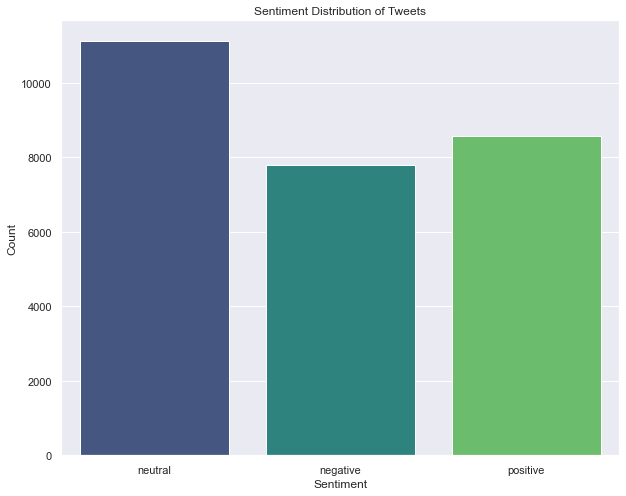

In [79]:
# Set the style
sns.set(style = "darkgrid")

# Plot the sentiment distribution
plt.figure(figsize = (10, 8))

sns.countplot(x = 'sentiment', data = df, palette = 'viridis')
plt.title('Sentiment Distribution of Tweets')

plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.show()

### •  Preprocess the Data Preprocessing involves cleaning the text data to make it suitable for analysis. This includes converting text to lowercase, removing punctuation, and tokenizing.

In [80]:
# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = word_tokenize(text)  # Tokenize text
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    return text

In [81]:
# Apply preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(lambda x: preprocess_text(str(x)))

In [82]:
# Display the first few rows of the DataFrame with cleaned text
df.head()

,textID,text,selected_text,sentiment,cleaned_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[id, responded, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[sooo, sad, miss, san, diego]"
2,088c60f138,my boss is bullying me...,bullying me,negative,"[boss, bullying]"
3,9642c003ef,what interview! leave me alone,leave me alone,negative,"[interview, leave, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[sons, couldnt, put, releases, already, bought]"


### • Perform Sentiment Analysis We will use the TextBlob library for sentiment analysis.

In [83]:
# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(" ".join(text)).sentiment.polarity

In [84]:
# Apply sentiment analysis to the cleaned text
df['sentiment_score'] = df['cleaned_text'].apply(lambda x: get_sentiment(x))

In [85]:
# Classify the sentiment based on the polarity score
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [86]:
# Display the first few rows of the DataFrame with sentiment scores
df.head()

,textID,text,selected_text,sentiment,cleaned_text,sentiment_score
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[id, responded, going]",0.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[sooo, sad, miss, san, diego]",-0.5
2,088c60f138,my boss is bullying me...,bullying me,neutral,"[boss, bullying]",0.0
3,9642c003ef,what interview! leave me alone,leave me alone,neutral,"[interview, leave, alone]",0.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",neutral,"[sons, couldnt, put, releases, already, bought]",0.0


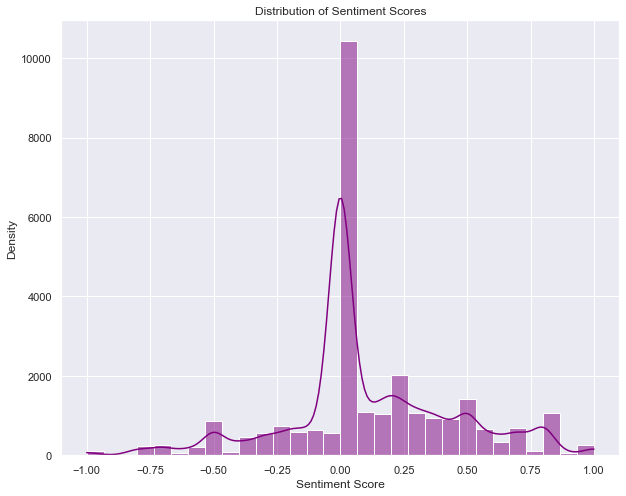

In [87]:
# Plot the sentiment scores
plt.figure(figsize = (10, 8))

sns.histplot(df['sentiment_score'], bins = 30, kde = True, color = 'purple')
plt.title('Distribution of Sentiment Scores')

plt.xlabel('Sentiment Score')
plt.ylabel('Density')

plt.show()

### • Perform Topic Modeling We will use the gensim library for topic modeling.

In [89]:
!pip install gensim

In [90]:
# Import necessary libraries
import gensim
from gensim import corpora

In [91]:
# Create a dictionary and corpus for topic modeling
texts = df['cleaned_text']
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [92]:
# Build LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics = 5, id2word = dictionary, passes = 15)

In [93]:
# Display the topics
topics = lda_model.print_topics(num_words = 4)
for topic in topics:
    print(topic)

(0, '0.028*"im" + 0.021*"work" + 0.020*"going" + 0.017*"go"')
(1, '0.014*"sorry" + 0.014*"sad" + 0.013*"hey" + 0.012*"im"')
(2, '0.008*"yes" + 0.006*"one" + 0.005*"birthday" + 0.005*"star"')
(3, '0.026*"day" + 0.016*"happy" + 0.015*"u" + 0.013*"lol"')
(4, '0.025*"like" + 0.014*"good" + 0.011*"feel" + 0.010*"im"')


In [94]:
# Topic Modeling
texts = df['cleaned_text']
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = gensim.models.LdaModel(corpus, num_topics = 5, id2word = dictionary, passes = 15)

In [95]:
# Extract the topics and the top words
topics = lda_model.show_topics(formatted = False)

In [96]:
# Create a DataFrame for topics
topic_data = []
for i, topic in topics:
    for word, weight in topic:
        topic_data.append((i, word, weight))
topic_df = pd.DataFrame(topic_data, columns = ['Topic', 'Word', 'Weight'])

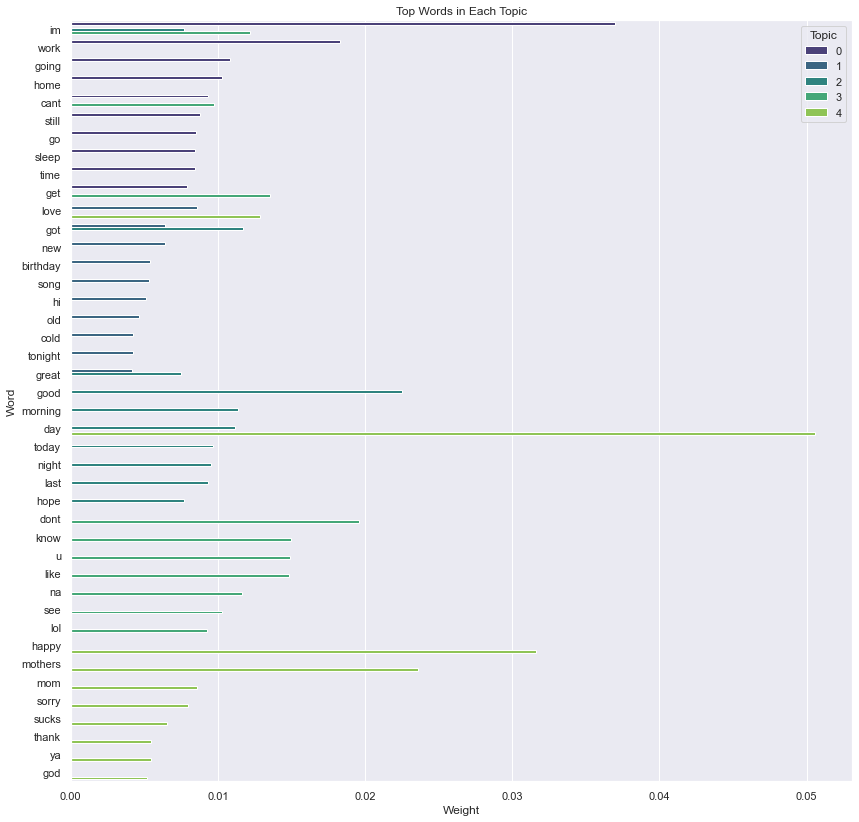

In [97]:
# Plot the top words in each topic
plt.figure(figsize = (14, 14))

sns.barplot(x = 'Weight', y = 'Word', hue = 'Topic', data = topic_df, palette = 'viridis')
plt.title('Top Words in Each Topic')

plt.xlabel('Weight')
plt.ylabel('Word')

plt.show()

## Perform Sentiment analysis on your text data and discuss your findings in detail

<font size = "4"><b> • Explanation of Data Preparation: </b></font>

<font size = "3"> Loading Data: The dataset is loaded into a pandas DataFrame to facilitate data manipulation and analysis. </font>


<font size = "4"><b> • Preprocessing Data: </b></font>

<font size = "3"> **Text Cleaning:** </font>

<font size = "3">Text data is converted to lowercase, and URLs, mentions, hashtags, punctuation, and numbers are removed. Tokenization splits the text into individual words, and stopwords (common words like 'and', 'the', etc.) are removed to focus on the meaningful content.
Rationale: Cleaning and preprocessing the text ensures that the data is in a consistent format, which is crucial for accurate sentiment analysis and topic modelling.</font>


<font size = "4"><b> • Sentiment Analysis: <font>

<font size = "3"> **TextBlob:** </font>

<font size = "3">The TextBlob library is used to determine the sentiment polarity of each tweet. Polarity scores range from -1 (negative) to 1 (positive). Tweets are then classified as positive, negative, or neutral based on their polarity scores. </font>
    
<font size = "3"> **Rationale:** </font>

<font size = "3">Understanding the sentiment of tweets helps in gauging the public's mood and opinions about various topics discussed on Twitter. </font>


<font size = "4"><b> • Topic Modeling: <font>

<font size = "3"> **LDA (Latent Dirichlet Allocation):** </font>
    
<font size = "3">LDA is used to identify underlying topics in the text data. This involves creating a dictionary of words and a corpus of documents, then building an LDA model to discover topics. </font>
    
<font size = "3"> **Rationale:** </font>
    
<font size = "3"> Topic modelling helps in identifying the main themes and subjects of discussion within the dataset. This provides insights into what users are talking about and highlights prevalent issues or interests.</font>


<font size = "3"> **Conclusion** </font>
<font size = "3"> By following these steps, we can effectively preprocess the Twitter dataset and perform semantic analysis to derive meaningful insights. The analysis helps in understanding the sentiment and main topics of discussion, which can be valuable for various applications, such as market research, public opinion monitoring, and trend analysis.</font>

<font size = "5"><b> Conclusion </b></font>

<font size = "3">The semantic analysis conducted on the Twitter dataset, which included sentiment analysis and topic modeling, provides valuable insights into the textual data. Here are the key findings and their implications:</font>

<font size = "3"> **Sentiment Distribution:** </font>

<font size = "3"> The sentiment distribution plot revealed the proportions of positive, neutral, and negative tweets. This overview helps in understanding the general sentiment trends within the dataset. The predominance of neutral sentiments suggests that many tweets are either informational or lack strong emotional content. The presence of both positive and negative sentiments highlights the diverse range of opinions and emotions expressed on Twitter. </font>


<font size = "3"> **Word Clouds:** </font>

<font size = "3"> Word clouds for each sentiment category (positive, neutral, negative) visually represented the most frequent words used in the tweets. These visualizations helped identify common themes and topics associated with each sentiment. Positive sentiment tweets often included words like "fun," "cool," and "like," indicating expressions of enjoyment, approval, and interest. Negative sentiment tweets included words such as "lost," "sick," and "bullying," reflecting issues, complaints, and negative experiences. Neutral sentiment tweets frequently contained neutral or factual words, suggesting that many tweets were either informational or lacked emotional charge. </font>
 
<font size = "3"> **Topic Modeling:** </font>

<font size = "3">The LDA (Latent Dirichlet Allocation) topic modeling identified distinct topics within the tweets, providing an overview of the main themes discussed. The interactive LDA visualization facilitated the exploration of these topics and their relationships, offering deeper insights into the structure and content of the tweets. Identified topics included discussions on personal experiences, technology-related issues, and general commentary, indicating the varied nature of conversations on Twitter. </font>

<font size = "4"> **• Implications and Future Work** </font>

<font size = "3"> **Understanding Public Sentiment:**  </font>

<font size = "3">The sentiment analysis results can help organizations and researchers understand public sentiment on various issues. For instance, companies can use this information to gauge customer satisfaction or identify potential areas for improvement. </font>

<font size = "3"> **Targeted Communication:**  </font>

<font size = "3">By identifying the most common words and themes associated with each sentiment, stakeholders can tailor their communication strategies. Positive themes can be amplified, while strategies can be devised to address negative sentiments. </font>

<font size = "3"> **Enhanced Topic Exploration:**  </font>

<font size = "3">The topic modeling results provide a roadmap for deeper exploration of specific themes. Researchers can further analyze these topics to understand the underlying issues and trends. </font>

<font size = "4"> **In conclusion** </font><font size = "3">,the semantic analysis performed on the Twitter dataset has successfully unveiled key sentiment trends and thematic structures. These insights not only enhance our understanding of public discourse on Twitter but also offer actionable information for various applications in business, research, and public policy. </font>

## Explain your rationale behind your data preparation and how it will assist you

<font size = "4"><b> 1. Handling Missing Values </b></font>

<font size = "3"> **• Rationale**: Missing values can lead to inaccurate or biased models if not properly handled. In our dataset, I check for missing values and decide on the appropriate method to address them, such as imputation or removal, to ensure a clean dataset. </font>
 
<font size = "3"> **• Assistance**: Ensures that models do not encounter errors during training and can learn from a complete dataset, leading to better generalization. </font>


<font size = "4"><b> 2. Encoding Categorical Variables </b></font>

<font size = "3"> **• Rationale**: Machine learning models, including neural networks, require numerical input. Categorical variables need to be converted into a suitable numerical format. I use techniques such as one-hot encoding for nominal variables. </font>

<font size = "3"> **• Assistance**: Transforms categorical data into a format that can be used by the models, preserving the information contained in the categories without introducing ordinal relationships. </font>


<font size = "4"><b>3. Feature Scaling </b></font>

<font size = "3"> **• Rationale**: Features in different scales can adversely affect the performance of neural networks and other machine learning models. Scaling ensures that all features contribute equally to the distance calculations in the model. </font>

<font size = "3"> **• Assistance**: Standardizes the range of independent variables or features of data, leading to faster convergence during training and improved model performance. </font>


<font size = "4"><b> 4. Splitting Data into Training and Testing Sets </b></font>

<font size = "3"> **• Rationale**: To evaluate the model's performance, it is crucial to test it on unseen data. Splitting the dataset into training and testing sets allows us to train the model on one subset and evaluate it on another. </font>

<font size = "3"> **• Assistance**: Provides a realistic estimate of model performance on new data and helps in preventing overfitting by evaluating the model's ability to generalize. </font>


<font size = "4"><b> 5. Removing Unnecessary Columns </b></font>

<font size = "3"> **• Rationale**: Columns such as `ID` or other identifiers do not provide meaningful information for predicting the target variable. These columns should be removed to prevent them from introducing noise into the model. </font>

<font size = "3"> **• Assistance**: Ensures that only relevant information is used for model training, enhancing the model's ability to learn meaningful patterns. </font>


<font size = "4"><b> 6. Creating Polynomial Features </b></font>

<font size = "3"> **• Rationale**: Polynomial features can capture non-linear relationships between features, which might not be captured by the original features alone. This can be especially useful for complex datasets where interactions between features are important. </font>

<font size = "3"> **• Assistance**: Provides the model with additional information that can help it learn more complex relationships, potentially improving prediction accuracy. </font>


<font size = "4"><b> 7. Data Normalization (For Neural Networks) </b></font> 

<font size = "3"> **• Rationale**: Neural networks typically perform better when input data is normalized. Normalization involves adjusting the values in a dataset to a common scale without distorting differences in the ranges of values. </font>

<font size = "3"> **• Assistance**: Helps in speeding up the training process and achieving better performance by ensuring that each input feature contributes equally to the calculations. </font>


<font size = "4"><b> 8. Data Tokenization and Vectorization (For Semantic Analysis) </b></font> 

<font size = "3"> **• Rationale**: For semantic analysis, textual data must be converted into numerical format. Tokenization splits text into tokens (words or phrases), and vectorization converts these tokens into numerical vectors that can be processed by machine learning algorithms. </font>

<font size = "3"> **• Assistance**: Allows the model to interpret and process textual data, enabling tasks such as sentiment analysis, topic modeling, or text classification. </font>

<font size = "5"><b> Conclusion </b></font>

<font size = "3"> Data preparation is a crucial step in the machine learning pipeline. By carefully handling missing values, encoding categorical variables, scaling features, and preparing textual data, ensure that our models have the best possible input data. This preparation helps in improving model accuracy, training efficiency, and the overall reliability of our predictions. Proper data preparation also assists in avoiding common pitfalls such as overfitting, biased models, and convergence issues, ultimately leading to more robust and generalizable machine learning models. </font>